In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('../Data/dataset.csv', delimiter=";")
print(df.head(5))

   id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95

In [77]:
df["ttf"] = df.groupby("id")["cycle"].transform("max")- df["cycle"]
print(df.head(5))

   id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0  14.62  ...  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  14.62  ...  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  14.62  ...  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  14.62  ...  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  14.62  ...  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

       s21  ttf  
0  23.4190  191  
1  23.4236  190  
2  23.3442  189  
3 

In [78]:
df1 = df[['id', 'ttf']]

In [79]:
np.random.seed(0)
df1 = df1.groupby('id')['ttf'].apply(np.random.choice).reset_index()

In [80]:
df1['maintenancetime'] = np.random.randint(1,5, size=len(df1))

In [81]:
df1.head()

,id,ttf,maintenancetime
0,1,19,2
1,2,239,3
2,3,61,1
3,4,121,3
4,5,17,1


In [82]:
df1.to_json('../Data/SchedulingData.json', orient='records', lines=True)

In [23]:
df = pd.read_csv('../Data/Livro2.csv', delimiter=";")
print(df.head(5))

   Generation       GA1       GA2       GA3       GA4
0           0  46429.62  46215.82  46463.69  45963.30
1           1  46267.34  47301.56  47163.06  46548.18
2           2  46487.04  47334.60  47686.10  47124.75
3           3  48089.28  47016.58  47839.56  47412.62
4           4  49304.52  47402.52  47843.69  48124.84


Text(0, 0.5, 'Fitness')

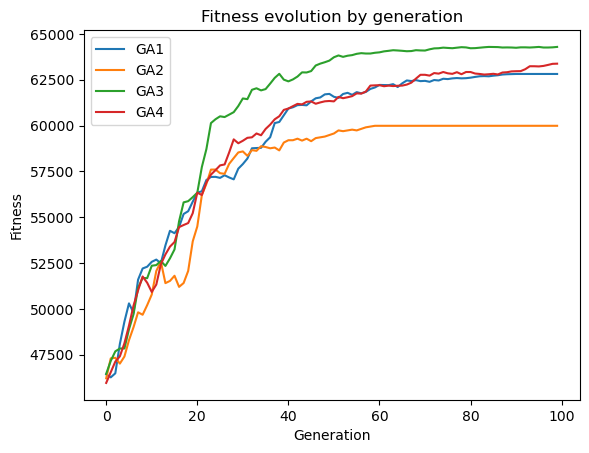

In [24]:
df.set_index('Generation', inplace=True)
ax = df.plot(title='Fitness evolution by generation')
ax.set_ylabel("Fitness")